# Chatbots with Lang graph

In [1]:
!pip install langgraph langsmith

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.4 MB/s eta 0:00:00


In [2]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.25
    Uninstalling langchain-core-0.3.25:
      Successfully uninstalled langchain-core-0.3.25
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.12
    Uninstalling langchain-0.3.12:
      Successfully uninstalled langchain-0.3.12


In [9]:
!pip install langchain huggingface_hub

In [28]:
from google.colab import userdata
hugginggace_api_key = userdata.get('Langgraph-agent')
langsmith = userdata.get('for_AIagent')

In [11]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "CourseLanggraph"
os.environ["HUGGINGFACEHUB_API_TOKEN"] = hugginggace_api_key

In [12]:
from langchain.llms import HuggingFaceHub

In [ ]:
#from langchain_groq import ChatGroq

In [13]:
# Setting the model of Hugging Face
llm = HuggingFaceHub(repo_id="gpt2", model_kwargs={"temperature": 0.7, "max_length": 100})

# guess with model
response = llm("Translate this sentence into French: 'Hello, how are you?'")
print(response)

<ipython-input-13-9c42dd7d60a1>:2: LangChainDeprecationWarning: The class `HuggingFaceHub` was deprecated in LangChain 0.0.21 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEndpoint``.
  llm = HuggingFaceHub(repo_id="gpt2", model_kwargs={"temperature": 0.7, "max_length": 100})
<ipython-input-13-9c42dd7d60a1>:5: LangChainDeprecationWarning: The method `BaseLLM.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = llm("Translate this sentence into French: 'Hello, how are you?'")
Content-Length: 1406
API Key: lsv2_********************************************7a
post: trace=e88dd827-cbf0-4785-8e92-0fcee27b1aee,id=e88dd827-cbf0-4785-8e92-0fcee27b1aee


Translate this sentence into French: 'Hello, how are you?'

D'Angelo: I'm sorry, I don't know. Thanks for the text.

D'Angelo: I'm sorry, I don't know.

D'Angelo: Thank you, everyone, great and good.

D'Angelo: I appreciate it, thank you for the text.

D'Angelo: I appreciate it, thank you for the text.

D'Angelo: It's nice to have a friend in the game.

D'Angelo: It's nice to have a friend in the game.

D'Angelo: It's nice to have a friend in the game.

D'Angelo: It's nice to have a friend in the game.

D'Angelo: It's nice to have a friend in the game.

D'Angelo: I was getting tired of this dude yelling around the room.

D'Angelo: I was getting tired of this dude yelling around the room.

D'Angelo: He was always in the middle of the room with the pants down, but he was always in the middle of the room with the pants down.

D'Angelo: He was always in the middle of the room with the pants down.

D'Angelo: He was always in the middle of the room with the pants down.

D'Angelo: And he was 

#Start Building Chatbot Using Langgraph

In [14]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [15]:
class State(TypedDict):
  # Messages have the type "list". The 'add_messages' function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages:Annotated[list, add_messages]

graph_builder=StateGraph(State)

In [16]:
graph_builder

In [17]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [18]:
graph_builder.add_node("chatbot", chatbot)

In [19]:
graph_builder

In [20]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [21]:
graph = graph_builder.compile()

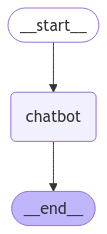

In [22]:
from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [27]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    for value in event.values():
      print("Assistant:", value["messages"])

User: hello
Assistant: Human: hello

My name is Dr. Terri. You are welcome to join us.

Let's start with the first thing.

I'm a Human.

I'm a Human that's been here.

I'm a Human that's been here for a long time.

I'm a Human that's been here for a long time.

I'm a Human that's been here for a long time.

I'm a Human that's been here for a long time.

I'm a Human that's been here for a long time.

I'm a Human that's been here for a long time.

And now… I'm a Human.

I'm a Human that's been here for a long time.

I'm a Human that's been here for a long time.

I'm a Human that's been here for a long time.

I'm a Human that's been here for a long time.

I'm a Human that's been here for a long time.

I'm a Human that's been here for a long time.

And now I'm a Boy.

I'm a Boy that's been here for a long time.

I'm a Boy that's been here for a long time.

I'm a Boy that's been here for a long time.

I'm a Boy that's been here for a long time.

I'm a Boy that's been here for a long time.



Content-Length: 7856
API Key: lsv2_********************************************7a
post: trace=968081a0-5193-4903-b681-d3e6ece8831d,id=968081a0-5193-4903-b681-d3e6ece8831d; trace=968081a0-5193-4903-b681-d3e6ece8831d,id=3ee98887-bd4b-46c0-9a76-34e9508b2c4c; trace=968081a0-5193-4903-b681-d3e6ece8831d,id=95af9933-8992-4855-8224-f4f300983696; trace=968081a0-5193-4903-b681-d3e6ece8831d,id=1d44dbd4-5aca-45cd-ad05-1a9adeb59b1e; trace=968081a0-5193-4903-b681-d3e6ece8831d,id=2e1baeb2-ceef-4723-a990-d9e3ad24ff52; trace=968081a0-5193-4903-b681-d3e6ece8831d,id=d2eedf80-8983-4034-be5a-2cb74b626317
Content-Length: 21040
API Key: lsv2_********************************************7a
post: trace=968081a0-5193-4903-b681-d3e6ece8831d,id=715ec902-1ec2-4673-a694-1802f1a40e72; patch: trace=968081a0-5193-4903-b681-d3e6ece8831d,id=968081a0-5193-4903-b681-d3e6ece8831d; trace=968081a0-5193-4903-b681-d3e6ece8831d,id=2e1baeb2-ceef-4723-a990-d9e3ad24ff52; trace=968081a0-5193-4903-b681-d3e6ece8831d,id=d2eedf80-8983-4

User: what is generative AI?


Content-Length: 8009
API Key: lsv2_********************************************7a
post: trace=f137397b-ae92-4418-8b39-88c9f817c1b8,id=f137397b-ae92-4418-8b39-88c9f817c1b8; trace=f137397b-ae92-4418-8b39-88c9f817c1b8,id=b9bc3129-66be-4c18-872f-f00ba2557abf; trace=f137397b-ae92-4418-8b39-88c9f817c1b8,id=3123726d-8e00-4c99-abab-4f6518c7ad8f; trace=f137397b-ae92-4418-8b39-88c9f817c1b8,id=d6320ec0-1e1e-4569-bcb7-77f2979257b3; trace=f137397b-ae92-4418-8b39-88c9f817c1b8,id=dd04971b-1c85-4075-94a1-3f1667f5d62b; trace=f137397b-ae92-4418-8b39-88c9f817c1b8,id=9f325ee7-8ebc-4c5f-9d2f-8fe5166a3ef3


Assistant: Human: what is generative AI?

What is generative AI? Artificial Intelligence is the Future. A new form of AI is being created, and so is AI that uses neural networks. The big problem with artificial intelligence is that it is very much around the edges of science. The idea is that human beings are moving to the next level. It is an example of how artificial intelligence is being developed. We are already bringing to the next level the very unique properties of human beings. We are working in a very fluid, time-driven way to advance AI.

The question is, what will we do with our human talent? The second question is, how will we move forward?

The answer is that we will need some sort of brain. A brain is a machine that processes and interprets and responds to data and events. It can make predictions at any time and it can even perform actual tasks. It is like a business machine. It is a sophisticated machine that works on a wide range of computer systems Backup it, deploy it

Content-Length: 29348
API Key: lsv2_********************************************7a
post: trace=f137397b-ae92-4418-8b39-88c9f817c1b8,id=2b689213-9ba3-4480-a6ec-489ee34bbb71; patch: trace=f137397b-ae92-4418-8b39-88c9f817c1b8,id=dd04971b-1c85-4075-94a1-3f1667f5d62b; trace=f137397b-ae92-4418-8b39-88c9f817c1b8,id=9f325ee7-8ebc-4c5f-9d2f-8fe5166a3ef3; trace=f137397b-ae92-4418-8b39-88c9f817c1b8,id=f137397b-ae92-4418-8b39-88c9f817c1b8


User: q
Good Bye
